In [1]:
# git clone repo để lấy data
!git clone https://github.com/lamtai2508/LNHONGTAI_DATA_ANALYTICS_SGU_2025.git

Cloning into 'LNHONGTAI_DATA_ANALYTICS_SGU_2025'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 36 (delta 7), reused 22 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (36/36), 22.09 MiB | 11.92 MiB/s, done.
Resolving deltas: 100% (7/7), done.


2.1.3 Bài thực hành số 1: Xây dựng cây quyết định và rừng cây trên dữ liệu Titanic

Dữ liệu lấy tại: https://www.kaggle.com/code/tumpanjawat/diabetes-eda-random-forest-hp

Mục tiêu hướng tới: xây dựng cây quyết dịnh và rừng cây để dự đoán người bị tiểu đường hay không.

Bước 1: import những thư viện sẽ sử dụng

In [11]:
# import các thư viện sẽ sử dụng
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz

Bước 2: chuẩn bị dữ liệu

In [4]:
# Lấy dữ liệu
df = pd.read_csv('/content/LNHONGTAI_DATA_ANALYTICS_SGU_2025/Data_Sets/diabetes.csv')
print("Kích thước dữ liệu:", df.shape)
print(df.head())

# Tách X và y
X = df.drop(columns=['Outcome'])
y = df['Outcome']

Kích thước dữ liệu: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Bước 3: chuẩn bị dữ liệu cho tập train và test để vẽ cây quyết định

In [5]:
# chuẩn bị dữ liệu train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Bước 4: xây dựng cây quyết định từ lớp DecisionTreeClassifier có trong thư viện Scikit-Learn

In [8]:
# Huấn luyện Decision Tree
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

Bước 5: hiện thị cây quyết định

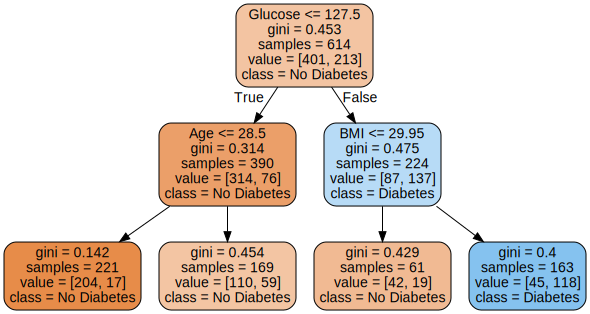

In [9]:
# 7️⃣ Vẽ cây
dot_data = export_graphviz(
    dt, out_file=None,
    feature_names=X.columns,
    class_names=['No Diabetes', 'Diabetes'],
    filled=True, rounded=True
)
graph = graphviz.Source(dot_data)
graph.render("diabetes_tree", format="png", cleanup=True)
graph

Bước 6: Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu của cây khác nhau

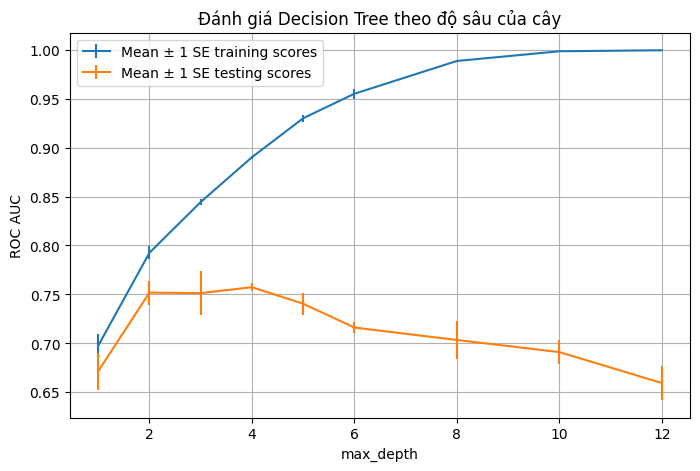

In [12]:
# Tạo cây quyết định và xác định các giá trị tham số có thể chọn để tìm tham số tối ưu
params = {'max_depth': [1, 2, 3, 4, 5, 6, 8, 10, 12]}
dt_cv = DecisionTreeClassifier(random_state=42)

cv = GridSearchCV(
    dt_cv,
    param_grid=params,
    scoring='roc_auc',   # Đánh giá theo ROC AUC
    cv=4,                # 4-fold cross-validation
    return_train_score=True
)
cv.fit(X_train, y_train)

# Vẽ biểu đồ đánh giá mô hình với các tham số chiều sâu khác nhau
cv_results_df = pd.DataFrame(cv.cv_results_)

plt.figure(figsize=(8, 5))
ax = plt.axes()
ax.errorbar(cv_results_df['param_max_depth'],
             cv_results_df['mean_train_score'],
             yerr=cv_results_df['std_train_score']/np.sqrt(4),
             label='Mean ± 1 SE training scores')
ax.errorbar(cv_results_df['param_max_depth'],
             cv_results_df['mean_test_score'],
             yerr=cv_results_df['std_test_score']/np.sqrt(4),
             label='Mean ± 1 SE testing scores')
ax.legend()
plt.xlabel('max_depth')
plt.ylabel('ROC AUC')
plt.title('Đánh giá Decision Tree theo độ sâu của cây')
plt.grid(True)
plt.show()

# Thực hiện xây dựng rừng cây

Bước 1,2,3: import các thư viện để sử dựng và chuẩn bị dữ liệu, do đã làm thực hiện ở trên để vẽ cây quyết định nên không cần làm lại


Bước 4: Huấn luyện RandomForestClassifier trong Scikit-Learn





In [14]:
# Huấn luyện RamDom Forest
rf_model = RandomForestClassifier(
    n_estimators=100,    # số cây mặc định
    max_depth=5,         # độ sâu tối đa mỗi cây
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

Bước 5: Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó

In [15]:
# Tìm tham số tối ưu cho mô hình rừng cây
params = {'n_estimators': [10, 50, 100, 150, 200, 300]}
rf = RandomForestClassifier(max_depth=7, random_state=42)

cv_rf = GridSearchCV(
    rf,
    param_grid=params,
    scoring='roc_auc',
    cv=4,
    n_jobs=-1,
    return_train_score=True,
    verbose=1
)
cv_rf.fit(X_train, y_train)

cv_rf_results_df = pd.DataFrame(cv_rf.cv_results_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


Bước 6: Vẽ biểu đồ đánh giá mô hình rừng cây với các tham số số cây có trong rừng khác nhau

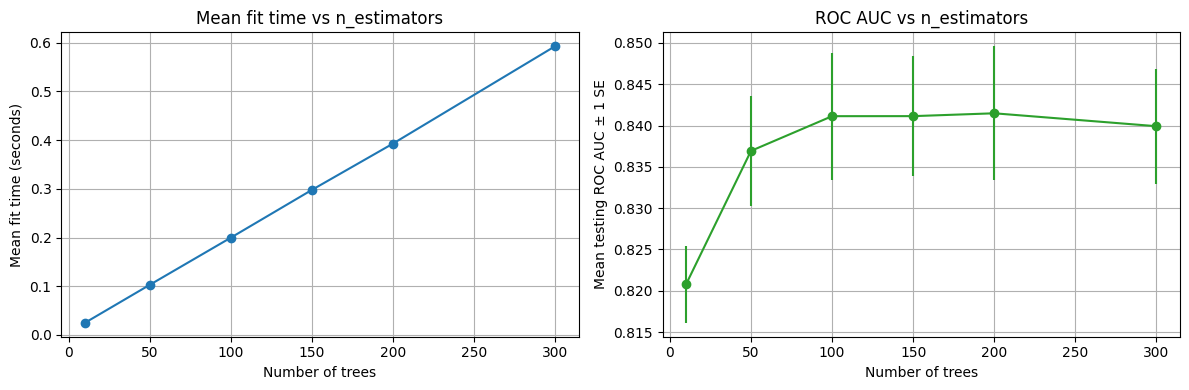

In [17]:
# Vẽ biểu đồ
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Biểu đồ 1: Thời gian huấn luyện
axs[0].plot(cv_rf_results_df['param_n_estimators'],
            cv_rf_results_df['mean_fit_time'],
            '-o', color='tab:blue')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[0].set_title('Mean fit time vs n_estimators')
axs[0].grid(True)

# Biểu đồ 2: ROC AUC trung bình ± 1 SE
cv = 4
axs[1].errorbar(cv_rf_results_df['param_n_estimators'],
                cv_rf_results_df['mean_test_score'],
                yerr=cv_rf_results_df['std_test_score']/np.sqrt(cv),
                fmt='-o', color='tab:green')
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC ± 1 SE')
axs[1].set_title('ROC AUC vs n_estimators')
axs[1].grid(True)

plt.tight_layout()
plt.show()

Bước 7: Xem tham số tốt nhất của rừng cây, xem mức độ quan trọng của từng feature trong mô hình với tham
số tốt nhất


 Tham số tốt nhất: {'n_estimators': 200}
 Điểm ROC AUC tốt nhất: 0.8414864717603836


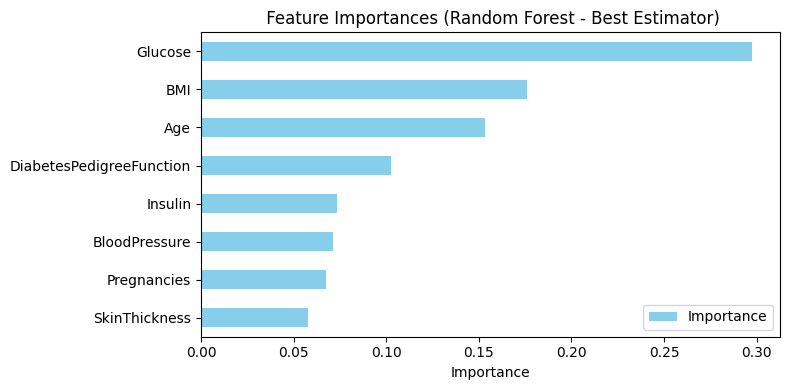

In [19]:
# Xem tham số tốt nhất và mức độ quan trọng của từng feature
print("\n Tham số tốt nhất:", cv_rf.best_params_)
print(" Điểm ROC AUC tốt nhất:", cv_rf.best_score_)

# Mô hình tốt nhất sau khi GridSearch
best_rf = cv_rf.best_estimator_

# Feature Importances
feat_imp_df = pd.DataFrame({
    'Importance': best_rf.feature_importances_
}, index=X.columns)

# Vẽ biểu đồ mức độ quan trọng của feature
feat_imp_df.sort_values('Importance', ascending=True).plot.barh(
    figsize=(8, max(4, 0.4*len(feat_imp_df))),
    color='skyblue'
)
plt.title(' Feature Importances (Random Forest - Best Estimator)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()